In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/titanic/train.csv')

### 1. Провести разведочный анализ, построить диаграммы распределений пасажиров по каждому из признаков. Построить графики совместного распределения для всех признаков.

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Изначально я хотел добавить Cabin, разделив его на класс и номер, но у некоторых пассажиров представлены 2-3 номера, что меня смущает. Кроме того у многих пропуски в этой фиче, так что я не буду её рассматривать.

In [ ]:
# df['Cabin_presented'] = np.logical_not(df['Cabin'].isna())
# df['Cabin_class'] = df['Cabin'][df['Cabin_presented']].apply(lambda x: x[0])
# df['Cabin_number'] = df['Cabin'][df['Cabin_presented']].apply(lambda x: int(x[1:]))

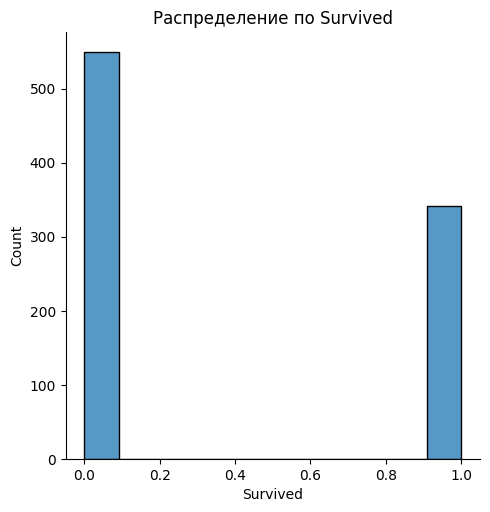

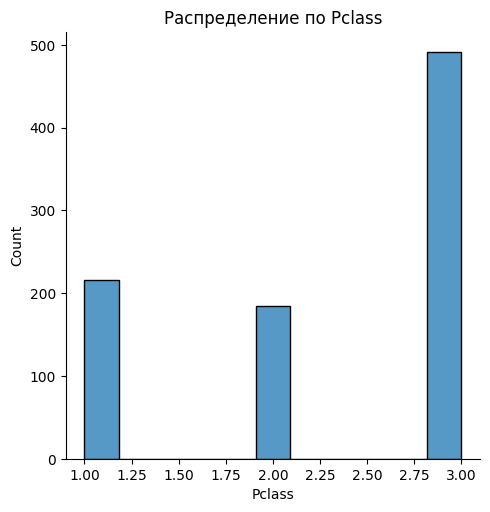

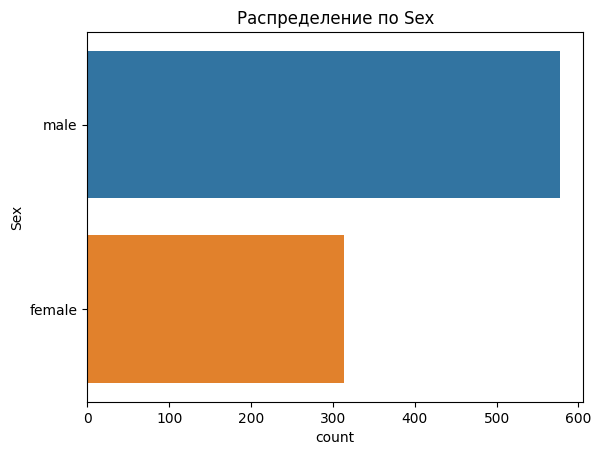

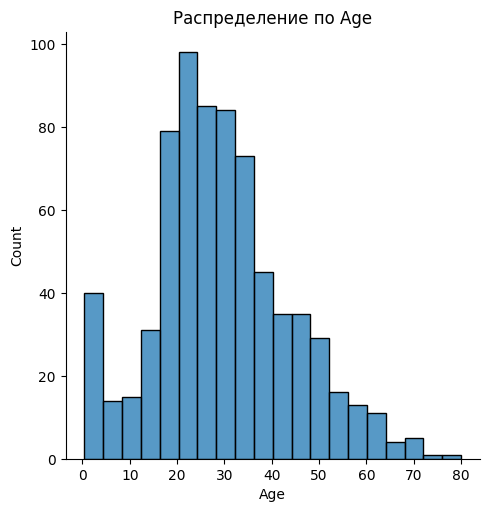

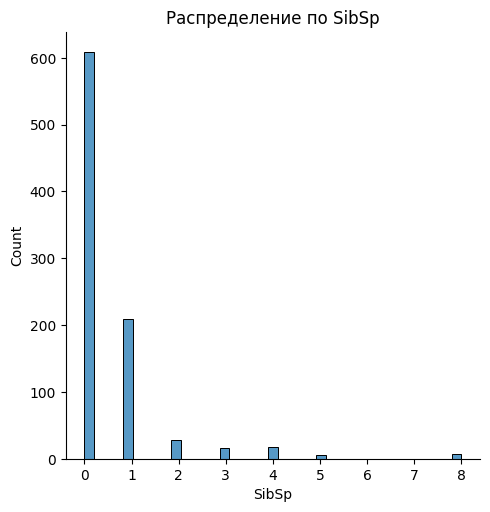

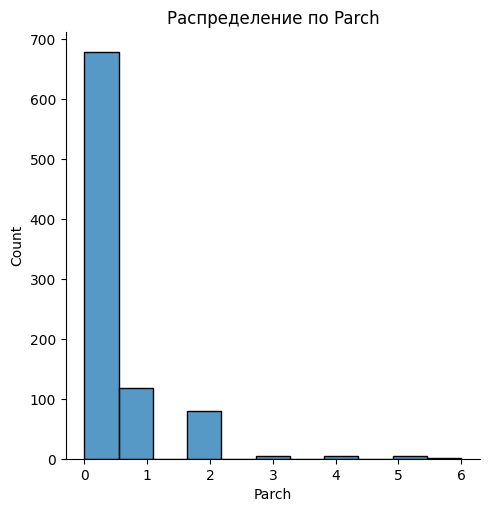

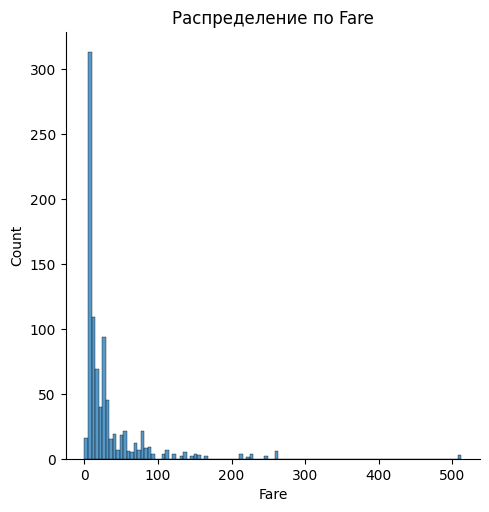

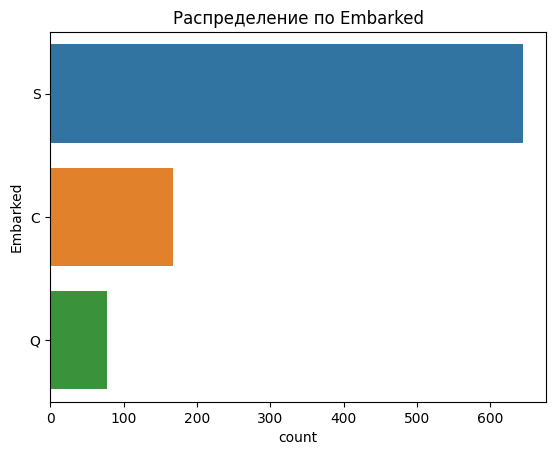

In [23]:
# Построение диаграмм распределения для каждого признака (кроме имён и ID)
for column in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', \
               'Parch', 'Fare', 'Embarked']:
    if df[column].dtype == 'object':
        # Для категориальных данных используем countplot
        sns.countplot(y=column, data=df)
    else:
        # Для числовых данных используем displot
        sns.displot(df[column].dropna())
    plt.title(f'Распределение по {column}')
    plt.show()


In [24]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
from sklearn.preprocessing import LabelEncoder

for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[f'{column}_encoded'] = le.fit_transform(df[column])
    print(le.classes_)
    df.drop(columns=[column], inplace=True)

['female' 'male']
['C' 'Q' 'S' nan]


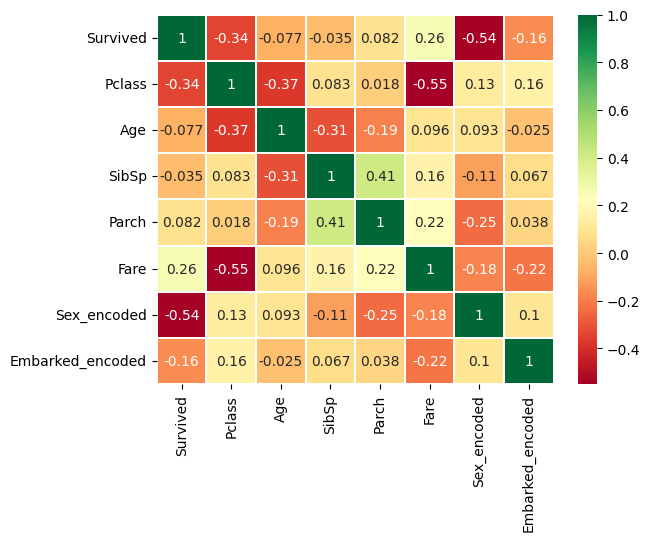

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()        

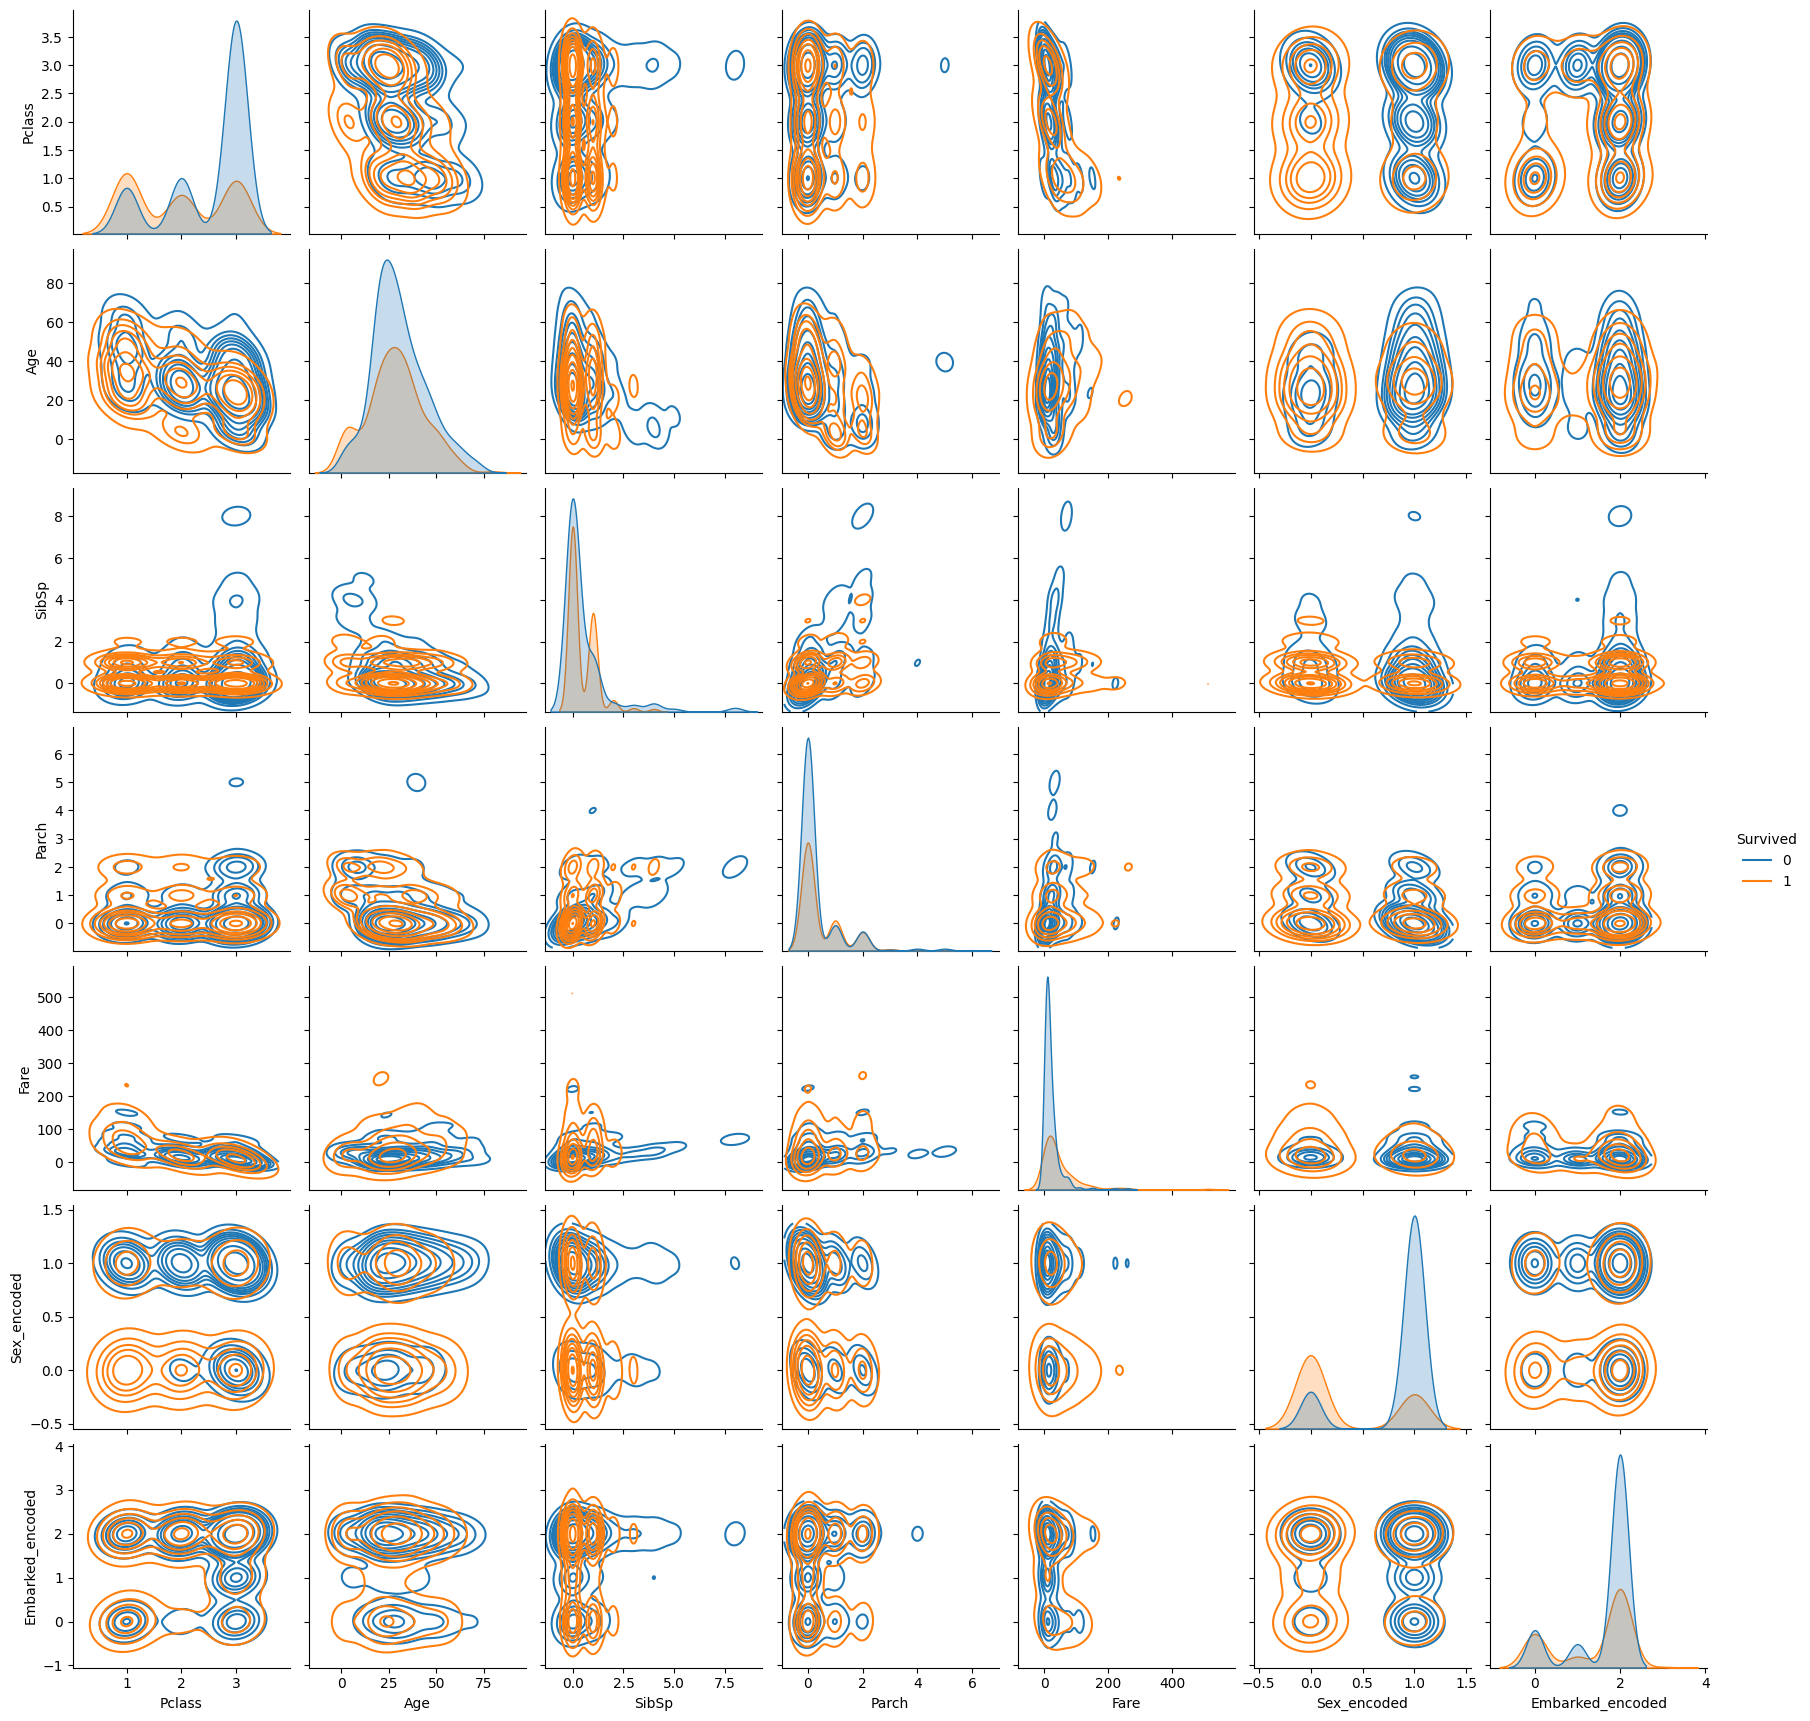

In [27]:
sns.pairplot(df, hue="Survived", kind='kde')

### 2. Провести такое же описание пассажиров отдельно для каждого класса билета. Составить средний портрет пассажира каждого класса

In [29]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]

# Группировка данных по классу билета
grouped = df.groupby('Pclass')

# Анализ каждого класса
average_portraits = []
for class_name, group in grouped:
    # Вычисление средних значений для числовых признаков
    summary = pd.DataFrame.copy(group.select_dtypes(include=['number']).mean())
    
    # Вычисление наиболее частых значений для категориальных признаков
    categorical_summary = pd.DataFrame.copy(group.select_dtypes(include=['object', 'category']).mode().iloc[0])

    # Сборка среднего портрета пассажира для каждого класса
    portrait = pd.concat([summary, categorical_summary], axis=0)
    
    gender = "Мужчина" if portrait["Sex"] == "male" else "Женщина"
    embark_town = portrait["Embarked"] if pd.notna(portrait["Embarked"]) else "неизвестен"
    age = round(portrait["Age"]) if pd.notna(portrait["Age"]) else "неизвестен"
    fare = np.round(portrait["Fare"], 2)
    sibsp = np.round(portrait["SibSp"], 2)
    parch = np.round(portrait["Parch"], 2)
    survived = np.round(portrait['Survived'], 2)
    
    description = (
        f"Средний пассажир {class_name} класса: {gender}, возрастом {age} лет. \n"
        f"Самая частая точка посадки: {embark_town}. \n"
        f"Средняя стоимость билета: {fare} долларов. \n"
        f"Число братьев/сестёр/супругов на борту: {sibsp}. \n"
        f"Число родителей/детей на борту: {parch}. \n"
        f"Процент выживания: {survived * 100}.\n"
    )

    print(description, "\n")

    


Средний пассажир 1 класса: Мужчина, возрастом 38 лет. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 84.15 долларов. 
Число братьев/сестёр/супругов на борту: 0.42. 
Число родителей/детей на борту: 0.36. 
Процент выживания: 63.0.
 

Средний пассажир 2 класса: Мужчина, возрастом 30 лет. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 20.66 долларов. 
Число братьев/сестёр/супругов на борту: 0.4. 
Число родителей/детей на борту: 0.38. 
Процент выживания: 47.0.
 

Средний пассажир 3 класса: Мужчина, возрастом 25 лет. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 13.68 долларов. 
Число братьев/сестёр/супругов на борту: 0.62. 
Число родителей/детей на борту: 0.39. 
Процент выживания: 24.0.
 



### 3. Провести такое же описание пассажиров отдельно для каждого диапазона возраста (<14, 14-21, 21-35, 35-55, >55). Составить средний портрет пассажира каждого возрастного диапазона

In [15]:
# Создание диапазонов возрастов
bins = [0, 14, 21, 35, 55, float('inf')]
labels = ['<14', '14-21', '21-35', '35-55', '>55']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Группировка данных по возрастной группе
grouped_by_age = df.groupby('age_group')

# Составление среднего портрета пассажира для каждого возрастного диапазона
for age_group, group in grouped_by_age:
    # Вычисление средних значений для числовых признаков
    summary = pd.DataFrame.copy(group.select_dtypes(include=['number']).mean())
    
    # Вычисление наиболее частых значений для категориальных признаков
    categorical_summary = pd.DataFrame.copy(group.select_dtypes(include=['object', 'category']).mode().iloc[0])

    # Сборка среднего портрета пассажира для каждого класса
    portrait = pd.concat([summary, categorical_summary], axis=0)
    
    gender = "Мужчина" if portrait["Sex"] == "male" else "Женщина"
    embark_town = portrait["Embarked"] if pd.notna(portrait["Embarked"]) else "неизвестен"
    age = round(portrait["Age"]) if pd.notna(portrait["Age"]) else "неизвестен"
    fare = np.round(portrait["Fare"], 2)
    sibsp = np.round(portrait["SibSp"], 2)
    parch = np.round(portrait["Parch"], 2)
    survived = np.round(portrait['Survived'], 2)
    
    description = (
        f"Средний пассажир в возрастной группе {age_group}: {gender}. \n"
        f"Самая частая точка посадки: {embark_town}. \n"
        f"Средняя стоимость билета: {fare} долларов. \n"
        f"Число братьев/сестёр/супругов на борту: {sibsp}. \n"
        f"Число родителей/детей на борту: {parch}. \n"
        f"Процент выживания: {survived * 100}.\n"
    )
    print(description)


Средний пассажир в возрастной группе <14: Мужчина. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 31.93 долларов. 
Число братьев/сестёр/супругов на борту: 1.83. 
Число родителей/детей на борту: 1.34. 
Процент выживания: 57.99999999999999.

Средний пассажир в возрастной группе 14-21: Мужчина. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 28.74 долларов. 
Число братьев/сестёр/супругов на борту: 0.42. 
Число родителей/детей на борту: 0.3. 
Процент выживания: 33.0.

Средний пассажир в возрастной группе 21-35: Мужчина. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 31.14 долларов. 
Число братьев/сестёр/супругов на борту: 0.33. 
Число родителей/детей на борту: 0.23. 
Процент выживания: 41.0.

Средний пассажир в возрастной группе 35-55: Мужчина. 
Самая частая точка посадки: S. 
Средняя стоимость билета: 43.58 долларов. 
Число братьев/сестёр/супругов на борту: 0.39. 
Число родителей/детей на борту: 0.5. 
Процент выживания: 40.0.

Средний пассажир в возрастн

### 4. На основе данных о пасажире научиться предсказывать в какой класс он попадет.построить пайплайн для обучения ивалидации модели. Провестиэксперимент с разными моделями logisitc regression, decision tree, svm.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Подготовка данных
X = df.drop('Pclass', axis=1)
y = df['Pclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обработка числовых и категориальных признаков
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Модели
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Обучение и оценка моделей
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")


Logistic Regression accuracy: 0.8268156424581006
Decision Tree accuracy: 0.9385474860335196
SVM accuracy: 0.8044692737430168


### 5. На основе данных о пасажире научиться предсказывать выживет ли он или нет.Построить пайплайн для обучения ивалидации модели. Провестиэксперимент с разными моделями logisitc regression, decision tree, svm.

In [20]:
# Подготовка данных
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обработка числовых и категориальных признаков
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Обучение и оценка моделей
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")


Logistic Regression accuracy: 0.7988826815642458
Decision Tree accuracy: 0.7988826815642458
SVM accuracy: 0.8156424581005587
